In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
#read in 4 csv files
import glob

# get data file names
path =r'../raw_data/yellow'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
yellow = pd.concat(dfs, ignore_index=True)

In [4]:
# define the columns need to be droped
needToDrop = ['VendorID','store_and_fwd_flag']
#drop the useless columns
cleaned_data = yellow.drop(columns = needToDrop)

In [5]:
#the top 15 sum of tip_amount area
cleaned_data.groupby('PULocationID')['tip_amount'].count().reset_index().sort_values('tip_amount', ascending=False).head(15)

,PULocationID,tip_amount
234,237,1565126
158,161,1469115
233,236,1420608
159,162,1298174
183,186,1269424
227,230,1225607
129,132,1142932
47,48,1119693
167,170,1092805
139,142,1082201


In [6]:
#create a column to show only the date
cleaned_data['DATE'] = pd.to_datetime(cleaned_data['tpep_pickup_datetime']).dt.date
cleaned_data["DATE"] = (cleaned_data["DATE"]).apply(str)

# make sure the date is right

In [7]:
#make sure all the data is in the four months selected  in 2019
start_date = "2019-01-01"
end_date = "2019-01-31"
after_start_date = cleaned_data["DATE"] >= start_date
before_end_date = cleaned_data["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
January = cleaned_data.loc[between_two_dates]

start_date = "2019-04-01"
end_date = "2019-04-30"
after_start_date = cleaned_data["DATE"] >= start_date
before_end_date = cleaned_data["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
April= cleaned_data.loc[between_two_dates]

start_date = "2019-07-01"
end_date = "2019-07-31"
after_start_date = cleaned_data["DATE"] >= start_date
before_end_date = cleaned_data["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
July= cleaned_data.loc[between_two_dates]

start_date = "2019-10-01"
end_date = "2019-10-31"
after_start_date = cleaned_data["DATE"] >= start_date
before_end_date = cleaned_data["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
October= cleaned_data.loc[between_two_dates]

cleaned_data = pd.concat([January,April,July,October], axis=0)
#after all remove the useless column DATE
cleaned_data = cleaned_data.drop(columns = "DATE")

In [8]:
cleaned_data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
7213891,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,151,239,1.0,7.00,0.50,0.5,1.65,0.00,0.3,9.95,NaN
7213892,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,239,246,1.0,14.00,0.50,0.5,1.00,0.00,0.3,16.30,NaN
7213898,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.30,1.0,163,229,1.0,6.50,0.50,0.5,1.25,0.00,0.3,9.05,NaN
7213899,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.70,1.0,229,7,1.0,13.50,0.50,0.5,3.70,0.00,0.3,18.50,NaN
7213900,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.10,1.0,141,234,1.0,10.00,0.50,0.5,1.70,0.00,0.3,13.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213888,2019-10-31 23:50:35,2019-11-01 00:08:45,NaN,4.63,NaN,186,166,NaN,29.26,2.75,0.0,0.00,0.00,0.3,32.31,0.0
7213889,2019-10-31 23:29:26,2019-10-31 23:59:15,NaN,17.49,NaN,45,122,NaN,54.25,2.75,0.0,0.00,6.12,0.3,63.42,0.0
7213890,2019-10-31 23:52:00,2019-11-01 00:39:00,NaN,15.97,NaN,140,91,NaN,39.62,2.75,0.5,0.00,6.12,0.3,49.29,0.0
15422511,2019-10-17 17:01:01,2019-10-17 17:24:30,2.0,3.74,1.0,50,79,2.0,17.50,0.50,0.5,0.00,0.00,0.3,21.30,2.5


In [9]:
#convert the pickup and dropoff date and time to  datetime64[ns]
cleaned_data["tpep_dropoff_datetime"] = pd.to_datetime(cleaned_data["tpep_dropoff_datetime"])
cleaned_data["tpep_pickup_datetime"] = pd.to_datetime(cleaned_data["tpep_pickup_datetime"])

In [10]:
#add columns time_used and avg_speed
cleaned_data["time_used"] = (cleaned_data["tpep_dropoff_datetime"]-cleaned_data["tpep_pickup_datetime"]).dt.seconds/60
cleaned_data["avg_speed"] = cleaned_data["trip_distance"]/cleaned_data["time_used"]*60

# remove implausible values

In [11]:
## Keep at least one passenger and no more than five
cleaned_data = cleaned_data[(cleaned_data['passenger_count']>0)&(cleaned_data["passenger_count"]<=5)]

##make sure the distance of trip is at least 0.1mile
cleaned_data = cleaned_data[cleaned_data["trip_distance"]>=0.1]

# only use the payment is 1.credit card \2.Cash\5.unknown
cleaned_data = cleaned_data[(cleaned_data["payment_type"]!=3)&(cleaned_data["payment_type"]!=4)&(cleaned_data["payment_type"]!=6)]

#Make sure the fare_amount larger than entry fee 2.5
cleaned_data = cleaned_data[(cleaned_data["fare_amount"]>=2.5)]

#Make sure the total_amount larger than entry fee 2.5
cleaned_data = cleaned_data[(cleaned_data["total_amount"]>=2.5)]

#there only 0 or 0.5 or 1 for extra
cleaned_data = cleaned_data[(cleaned_data["extra"]== 0 )|(cleaned_data["extra"]== 0.5 )|(cleaned_data["extra"]== 1)]

## Make sure all the trip is happened within2019
cleaned_data = cleaned_data[(cleaned_data["tpep_pickup_datetime"]<="2019-12-31 23:59:59") & (cleaned_data["tpep_dropoff_datetime"]<="2019-12-31 23:59:59")]
cleaned_data = cleaned_data[(cleaned_data["tpep_pickup_datetime"]>="2019-01-01 00:00:00") & (cleaned_data["tpep_dropoff_datetime"]>="2019-01-01 00:00:00")]

#make sure the average speed is lower than 100 and larger than 1
cleaned_data = cleaned_data[(cleaned_data["avg_speed"]<=100) & (cleaned_data["avg_speed"]>=1)]

#make sure the time used is more than 2 minute and less than  3 hours
cleaned_data = cleaned_data[(cleaned_data["time_used"]>=2)& (cleaned_data["time_used"]<180)]

# remove useless columns and add useful columns

In [12]:
#add the congetion surcharge to the total amount and form the column final amount
cleaned_data["final_amount"] = cleaned_data["total_amount"]+cleaned_data["congestion_surcharge"]

#remove the usless columns
remove = ["payment_type","extra","mta_tax","improvement_surcharge","tolls_amount","congestion_surcharge"]
cleaned_data = cleaned_data.drop(columns=remove)



In [13]:
#change the type of datetime data back to string
cleaned_data["tpep_dropoff_datetime"] = (cleaned_data["tpep_dropoff_datetime"]).apply(str)
cleaned_data["tpep_pickup_datetime"] = (cleaned_data["tpep_pickup_datetime"]).apply(str)

In [14]:
cleaned_data['DATE'] = pd.to_datetime(cleaned_data['tpep_pickup_datetime']).dt.date

In [15]:
cleaned_data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,time_used,avg_speed,final_amount,DATE
7213891,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,151,239,7.0,1.65,9.95,6.666667,13.500000,NaN,2019-01-01
7213892,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,239,246,14.0,1.00,16.30,19.200000,8.125000,NaN,2019-01-01
7213898,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.30,1.0,163,229,6.5,1.25,9.05,7.150000,10.909091,NaN,2019-01-01
7213899,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.70,1.0,229,7,13.5,3.70,18.50,13.633333,16.283619,NaN,2019-01-01
7213900,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.10,1.0,141,234,10.0,1.70,13.00,12.000000,10.500000,NaN,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167164,2019-10-31 23:16:13,2019-10-31 23:26:28,1.0,2.13,1.0,239,141,10.0,0.00,13.80,10.250000,12.468293,16.30,2019-10-31
7167165,2019-10-31 23:33:26,2019-10-31 23:49:39,2.0,5.59,1.0,236,148,19.0,4.56,27.36,16.216667,20.682425,29.86,2019-10-31
7167166,2019-10-31 23:57:00,2019-11-01 00:15:54,4.0,2.38,1.0,79,100,13.5,3.46,20.76,18.900000,7.555556,23.26,2019-10-31
7167167,2019-10-31 23:46:11,2019-11-01 00:29:35,1.0,19.03,2.0,132,48,52.0,0.00,55.30,43.400000,26.308756,57.80,2019-10-31


In [15]:
#save the data before removing the outliers
cleaned_data.reset_index().to_feather("../preprocessed_data/cleaned_yellow_19.feather")

# boxplot of data before IQR

In [16]:
# boxplot
PUDO_location=["PULocationID","DOLocationID"]
amount=["fare_amount","tip_amount","final_amount"]

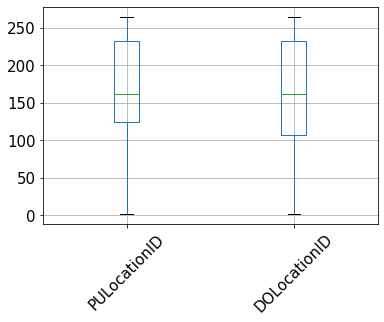

In [17]:
PUDO_boxplot = cleaned_data.boxplot(column = PUDO_location,rot = 45 ,fontsize = 15)

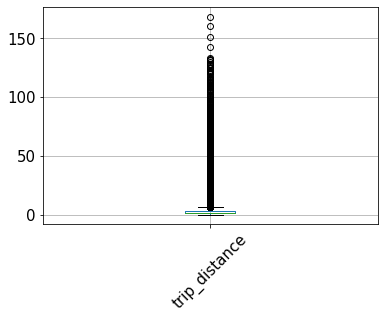

In [18]:
distance_plot = cleaned_data.boxplot(column = "trip_distance",rot = 45,fontsize = 15)

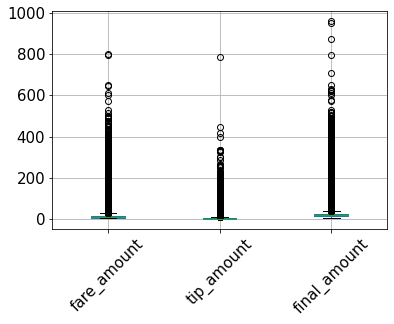

In [19]:
amount_boxplot = cleaned_data.boxplot(column = amount,rot = 45 ,fontsize = 15)


# IQR



In [20]:
#seperate the location around airport
jfk_data = cleaned_data[(cleaned_data["RatecodeID"]==2)]
standard_data = cleaned_data[(cleaned_data["RatecodeID"]==1)]

In [21]:
#apply data cleaning to the jfk data
jfk_data = jfk_data[jfk_data["fare_amount"]>=52]
jfk_data = jfk_data[jfk_data["final_amount"]>52]
jfk_data = jfk_data[jfk_data["tip_amount"]<150]

In [22]:
jfk_data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,time_used,avg_speed,final_amount,DATE
11476943,2019-01-18 14:08:41,2019-01-18 14:58:26,1.0,20.60,2.0,239,132,52.0,8.00,66.56,49.750000,24.844221,66.56,2019-01-18
11481121,2019-01-18 14:00:13,2019-01-18 14:52:28,1.0,18.10,2.0,211,132,52.0,13.15,65.95,52.250000,20.784689,65.95,2019-01-18
12047612,2019-01-20 23:06:45,2019-01-20 23:40:23,1.0,20.70,2.0,132,239,52.0,11.44,70.00,33.633333,36.927651,70.00,2019-01-20
12053976,2019-01-21 00:57:40,2019-01-21 01:22:28,4.0,17.74,2.0,132,164,52.0,0.00,58.56,24.800000,42.919355,58.56,2019-01-21
12054001,2019-01-21 00:09:18,2019-01-21 00:37:42,5.0,18.44,2.0,132,246,52.0,10.80,69.36,28.400000,38.957746,69.36,2019-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167046,2019-10-31 23:02:44,2019-10-31 23:12:38,1.0,7.27,2.0,56,170,52.0,4.00,65.42,9.900000,44.060606,67.92,2019-10-31
7167052,2019-10-31 23:39:40,2019-11-01 00:06:07,1.0,16.43,2.0,132,170,52.0,0.00,55.30,26.450000,37.270321,57.80,2019-10-31
7167106,2019-10-31 23:36:36,2019-11-01 00:10:47,1.0,18.30,2.0,132,148,52.0,11.06,66.36,34.183333,32.120917,68.86,2019-10-31
7167109,2019-10-31 23:05:41,2019-10-31 23:37:52,1.0,18.34,2.0,132,262,52.0,0.00,61.42,32.183333,34.191611,63.92,2019-10-31


In [23]:
#define Q1 Q3 and IQR
JFK_Q1 = jfk_data.quantile(0.25)
JFK_Q3 = jfk_data.quantile(0.75)
JFK_IQR = JFK_Q3-JFK_Q1

standard_Q1 = standard_data.quantile(0.25)
standard_Q3 = standard_data.quantile(0.75)
standard_IQR = standard_Q3-standard_Q1

In [24]:
#show the 5IQR is suitable for jfk
print(JFK_Q1-5*JFK_IQR,JFK_Q3+5*JFK_IQR)

passenger_count     -4.000000
trip_distance        6.400000
RatecodeID           2.000000
PULocationID        87.000000
DOLocationID      -178.000000
fare_amount         52.000000
tip_amount         -61.400000
total_amount         0.020000
time_used          -69.666667
avg_speed          -41.893760
final_amount         2.520000
dtype: float64 passenger_count      7.000000
trip_distance       29.940000
RatecodeID           2.000000
PULocationID       186.000000
DOLocationID       504.000000
fare_amount         52.000000
tip_amount          73.680000
total_amount       135.100000
time_used          154.733333
avg_speed           94.452676
final_amount       137.600000
dtype: float64


In [25]:
#show the 5IQR is suitable for standard
print(standard_Q1-5*standard_IQR,standard_Q3+5*standard_IQR)

passenger_count     -4.000000
trip_distance       -8.500000
RatecodeID           1.000000
PULocationID      -481.000000
DOLocationID      -528.000000
fare_amount        -31.000000
tip_amount         -13.750000
total_amount       -33.000000
time_used          -46.866667
avg_speed          -22.017885
final_amount       -33.020000
dtype: float64 passenger_count      7.000000
trip_distance       12.400000
RatecodeID           1.000000
PULocationID       828.000000
DOLocationID       869.000000
fare_amount         51.500000
tip_amount          16.500000
total_amount        62.260000
time_used           71.016667
avg_speed           42.695435
final_amount        67.960000
dtype: float64


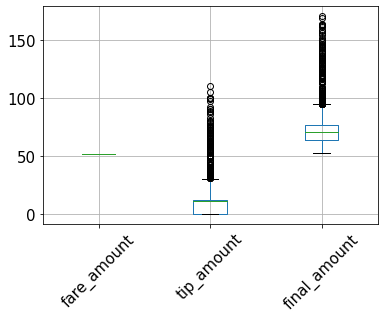

In [26]:
JFK_boxplot = jfk_data.boxplot(column = amount,rot = 45 ,fontsize = 15)

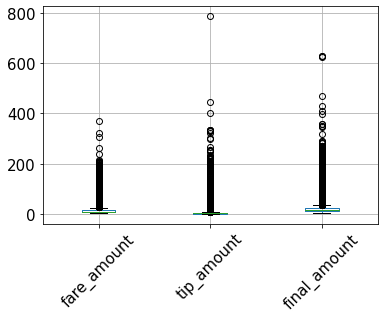

In [27]:
standard_boxplot = standard_data.boxplot(column = amount,rot = 45 ,fontsize = 15)

In [28]:
#remove the outliers in jfk
JFK =jfk_data[~((jfk_data<(JFK_Q1-5*JFK_IQR))|(jfk_data > (JFK_Q3+5*JFK_IQR))).any(axis=1)]

#remove the outliers in standard
standard =standard_data[~((standard_data<(standard_Q1-5*standard_IQR))|(standard_data > (standard_Q3+5*standard_IQR))).any(axis=1)]

In [29]:
#show jfk
JFK

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,time_used,avg_speed,final_amount,DATE
12047612,2019-01-20 23:06:45,2019-01-20 23:40:23,1.0,20.70,2.0,132,239,52.0,11.44,70.00,33.633333,36.927651,70.00,2019-01-20
12053976,2019-01-21 00:57:40,2019-01-21 01:22:28,4.0,17.74,2.0,132,164,52.0,0.00,58.56,24.800000,42.919355,58.56,2019-01-21
12054001,2019-01-21 00:09:18,2019-01-21 00:37:42,5.0,18.44,2.0,132,246,52.0,10.80,69.36,28.400000,38.957746,69.36,2019-01-21
12054010,2019-01-21 00:21:03,2019-01-21 00:56:18,1.0,20.12,2.0,132,166,52.0,6.00,64.56,35.250000,34.246809,64.56,2019-01-21
12054051,2019-01-21 00:16:20,2019-01-21 00:46:00,1.0,18.40,2.0,132,90,52.0,14.60,73.16,29.666667,37.213483,73.16,2019-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167009,2019-10-31 23:46:05,2019-11-01 00:13:03,2.0,11.08,2.0,93,164,52.0,0.00,61.42,26.966667,24.652658,63.92,2019-10-31
7167052,2019-10-31 23:39:40,2019-11-01 00:06:07,1.0,16.43,2.0,132,170,52.0,0.00,55.30,26.450000,37.270321,57.80,2019-10-31
7167106,2019-10-31 23:36:36,2019-11-01 00:10:47,1.0,18.30,2.0,132,148,52.0,11.06,66.36,34.183333,32.120917,68.86,2019-10-31
7167109,2019-10-31 23:05:41,2019-10-31 23:37:52,1.0,18.34,2.0,132,262,52.0,0.00,61.42,32.183333,34.191611,63.92,2019-10-31


In [30]:
#show standard
standard

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,time_used,avg_speed,final_amount,DATE
7213891,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,151,239,7.0,1.65,9.95,6.666667,13.500000,NaN,2019-01-01
7213892,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,239,246,14.0,1.00,16.30,19.200000,8.125000,NaN,2019-01-01
7213898,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.30,1.0,163,229,6.5,1.25,9.05,7.150000,10.909091,NaN,2019-01-01
7213899,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.70,1.0,229,7,13.5,3.70,18.50,13.633333,16.283619,NaN,2019-01-01
7213900,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.10,1.0,141,234,10.0,1.70,13.00,12.000000,10.500000,NaN,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167162,2019-10-31 23:25:47,2019-10-31 23:42:20,2.0,8.30,1.0,255,133,24.5,5.15,30.95,16.550000,30.090634,30.95,2019-10-31
7167164,2019-10-31 23:16:13,2019-10-31 23:26:28,1.0,2.13,1.0,239,141,10.0,0.00,13.80,10.250000,12.468293,16.30,2019-10-31
7167165,2019-10-31 23:33:26,2019-10-31 23:49:39,2.0,5.59,1.0,236,148,19.0,4.56,27.36,16.216667,20.682425,29.86,2019-10-31
7167166,2019-10-31 23:57:00,2019-11-01 00:15:54,4.0,2.38,1.0,79,100,13.5,3.46,20.76,18.900000,7.555556,23.26,2019-10-31


In [31]:
#combine the data together
final = standard.append(jfk_data, ignore_index=True)

In [32]:
#show the final data
final

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,time_used,avg_speed,final_amount,DATE
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,151,239,7.0,1.65,9.95,6.666667,13.500000,NaN,2019-01-01
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,239,246,14.0,1.00,16.30,19.200000,8.125000,NaN,2019-01-01
2,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.30,1.0,163,229,6.5,1.25,9.05,7.150000,10.909091,NaN,2019-01-01
3,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.70,1.0,229,7,13.5,3.70,18.50,13.633333,16.283619,NaN,2019-01-01
4,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.10,1.0,141,234,10.0,1.70,13.00,12.000000,10.500000,NaN,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19350141,2019-10-31 23:02:44,2019-10-31 23:12:38,1.0,7.27,2.0,56,170,52.0,4.00,65.42,9.900000,44.060606,67.92,2019-10-31
19350142,2019-10-31 23:39:40,2019-11-01 00:06:07,1.0,16.43,2.0,132,170,52.0,0.00,55.30,26.450000,37.270321,57.80,2019-10-31
19350143,2019-10-31 23:36:36,2019-11-01 00:10:47,1.0,18.30,2.0,132,148,52.0,11.06,66.36,34.183333,32.120917,68.86,2019-10-31
19350144,2019-10-31 23:05:41,2019-10-31 23:37:52,1.0,18.34,2.0,132,262,52.0,0.00,61.42,32.183333,34.191611,63.92,2019-10-31


# box plot after IQR 

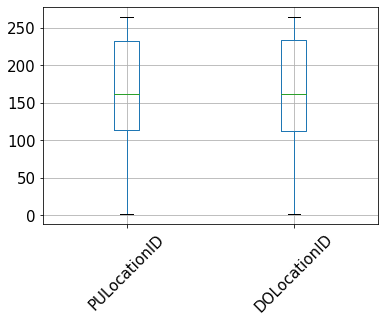

In [33]:
#boxplot
PUDO_boxplot = final.boxplot(column = PUDO_location,rot = 45 ,fontsize = 15)

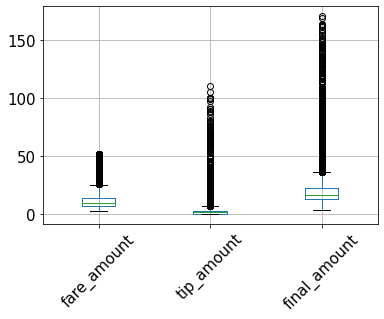

In [34]:
amount_boxplot = final.boxplot(column = amount,rot = 45 ,fontsize = 15)

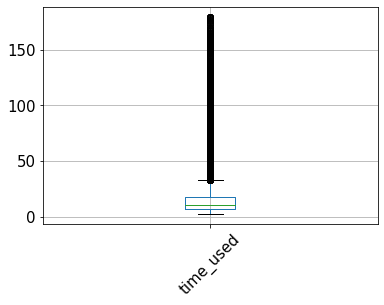

In [35]:
timeUsed_boxplot = final.boxplot(column = "time_used",rot = 45,fontsize = 15)

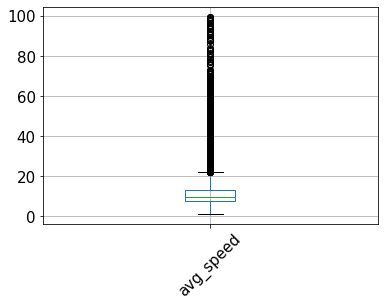

In [36]:
avgSpeed_boxplot = final.boxplot(column = "avg_speed",rot = 45,fontsize = 15)

In [37]:
#save the data after the removing of outliers
final.reset_index().to_feather("../preprocessed_data/cleaned_yellow_19_5IQR.feather")